# Logistic Regression Machine Learning Method Using Scikit Learn and Pandas Python - Tutorial 31
https://www.youtube.com/watch?v=1nWFHa6K23w

In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

## Logistic regression on mtcars

In [3]:
import statsmodels.api as sm

In [4]:
cars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data

In [5]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Checking for independence between features

In [6]:
# cars['car_names'] = cars.index

In [7]:
cars2 = pd.DataFrame()

In [8]:
cars2['drat'] = cars['drat']
cars2['carb'] = cars['carb']

In [9]:
cars_data = cars2.values

In [10]:
# cars_data = cars.iloc[:,(5,11)].values
# cars_data = cars.iloc[:,(4,10)].values

In [11]:
cars_data_names = ['drat','carb']

<AxesSubplot:xlabel='drat', ylabel='carb'>

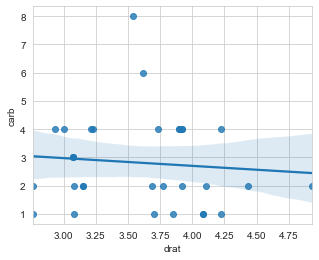

In [12]:
sb.regplot(x='drat', y='carb', data=cars, scatter=True)

In [13]:
drat = cars['drat']
carb = cars['carb']
spearmanr_coefficient, p_value = spearmanr(drat, carb)
print('Spearmant Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearmant Rank Correlation Coefficient -0.125


### Check for missing values

In [14]:
cars.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

Zero missing values!

### Checking that your target is binary or ordinal

<AxesSubplot:xlabel='am', ylabel='count'>

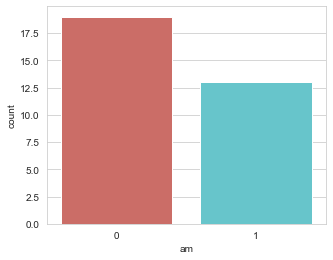

In [15]:
sb.countplot(x='am', data = cars, palette = 'hls')

### Checking that your dataset size is sufficient

In [16]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 4.2+ KB


Could be a potential problem because the dataset is small (<50)

### Deplying and evaluating your model

In [17]:
X = scale(cars_data)

In [18]:
# No idea if this is right, but I had to assign something to 'y'
y = cars['carb']

In [19]:
LogReg = LogisticRegression()

LogReg.fit(X,y)

LogisticRegression()

In [20]:
print(LogReg.score(X,y))

0.84375


Evaluate model

In [21]:
y_pred = LogReg.predict(X)
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       0.00      0.00      0.00         3
           4       0.67      1.00      0.80        10
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1

    accuracy                           0.84        32
   macro avg       0.44      0.50      0.47        32
weighted avg       0.74      0.84      0.78        32



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
